VITHIKA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # Linear Algebra and lists
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk #Used for NLP
from nltk.corpus import stopwords #MLP

from sklearn.feature_extraction.text import TfidfVectorizer #list to vector

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,auc
import pickle

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv') 

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
movies.shape

(4803, 20)

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies = movies.merge(credits,on='title')
#merging the two datasets in movies, according to the title

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
print(movies.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')


In [ ]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
#only kept essential coulums, dropped only the ones required

In [ ]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
import ast
#abstract syntax trees

In [ ]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 
#The literal_eval safely evaluate an expression node or a string containing a Python literal or container display.
#Reads input in the form of a dictionary and appends name only.

In [ ]:
movies.dropna(inplace=True)

In [ ]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()
#calling function convert and doing the function for genres

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()
#same thing for key words

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [ ]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [ ]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()
#same thing for cast

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [ ]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

#only if job is director then append

In [ ]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [ ]:
#movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
4770,326576,Dawn of the Crescent Moon,A group of college students travel to a small ...,"[Thriller, Drama, Science Fiction]",[],"[Barry Corbin, Brooke Coleman, Kurt Cole]",[Kirk Loudon]
176,281957,The Revenant,"In the 1820s, a frontiersman, Hugh Glass, sets...","[Western, Drama, Adventure, Thriller]","[father son relationship, rape, based on novel...","[Leonardo DiCaprio, Tom Hardy, Will Poulter]",[Alejandro González Iñárritu]
1257,10461,Get Carter,Remake of the Michael Caine classic. Jack Cart...,"[Action, Drama, Thriller, Crime]","[ritual, pornographic video, car crash, dvd]","[Sylvester Stallone, Miranda Richardson, Racha...",[Stephen T. Kay]
433,146216,RED 2,Retired C.I.A. agent Frank Moses reunites his ...,"[Action, Comedy, Crime, Thriller]","[paris, london england, cia, russia, mi6, hire...","[Bruce Willis, Catherine Zeta-Jones, Anthony H...",[Dean Parisot]
549,10153,Sphere,The OSSA discovers a spacecraft thought to be ...,[Science Fiction],"[ocean, extraterrestrial technology, space mar...","[Dustin Hoffman, Sharon Stone, Samuel L. Jackson]",[Barry Levinson]


In [ ]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1
#replacing sapce with comma

In [ ]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [ ]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [ ]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())
#coverting to a list

In [ ]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [ ]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
#everything added to tags

In [ ]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [ ]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
#new.head()
#dropping coums as everything is in 
#dataset name --> new 

In [ ]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()
#joining the lists in tags to a a string

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
#stop words, keep main words


In [ ]:
vector = cv.fit_transform(new['tags']).toarray()

In [ ]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vector.shape

(4806, 5000)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vector)

In [ ]:
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [ ]:
with open('/content/similarity.pickle', 'wb') as efile:
    pickle.dump(similarity, efile, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
def recommend(movie):
    l=[]
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        #print(new.iloc[i[0]].title)
        l.append(new.iloc[i[0]].title)
    
    return l
        
    

In [ ]:
print("Enter a movie: ", end=" ")
movie=input()
recommend(movie)

Enter a movie:  Spectre


['Quantum of Solace',
 'Never Say Never Again',
 'Skyfall',
 'Thunderball',
 'From Russia with Love']

<font size="6">Sentiment Analysis</font>

ANKUR

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/reviews.txt',sep = '\t', names =['Reviews','Comments'])

In [ ]:
dataset.head()

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [ ]:
a=dataset['Reviews'].value_counts()

1    3943
0    2975
Name: Reviews, dtype: int64

In [ ]:
stopset = set(stopwords.words('english'))

In [ ]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
transformer = TfidfTransformer()

In [ ]:
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
X = transformer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
accuracy_score(y_test,clf.predict(X_test))*100 #testing accuracy

97.32658959537572

In [ ]:
accuracy_score(y_train,clf.predict(X_train))*100 #training accuracy

99.42175641488977

In [ ]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
accuracy_score(y_test,clf.predict(X_test))*100 #ALWAYS ACCURACY SCORE

97.32658959537572

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
 
# defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
param_grid = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}  
grid = GridSearchCV(naive_bayes.MultinomialNB(), param_grid, refit = True, verbose = 3) #grid

# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...........................alpha=1;, score=0.973 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.972 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.986 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.986 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.977 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.972 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.967 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.977 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.981 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.972 total time=   0.0s
[CV 1/5] END ........................alpha=0.01;, score=0.972 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;,

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)},
             verbose=3)

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

0.9786770363182837
MultinomialNB(alpha=1)


In [ ]:
weighted_prediction = grid.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, weighted_prediction))
print('F1 score:', f1_score(y_test, weighted_prediction,average='weighted'))
print('Recall:', recall_score(y_test, weighted_prediction, average='weighted'))
print('Precision:', precision_score(y_test, weighted_prediction,average='weighted'))

Accuracy: 0.9732658959537572
F1 score: 0.973221595222043
Recall: 0.9732658959537572
Precision: 0.9733545264035355


In [ ]:
print ('Clasification report:\n', classification_report(y_test, weighted_prediction))

Clasification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       580
           1       0.97      0.99      0.98       804

    accuracy                           0.97      1384
   macro avg       0.97      0.97      0.97      1384
weighted avg       0.97      0.97      0.97      1384



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, weighted_prediction)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[555  25]
 [ 12 792]]

True Positives(TP) =  555

True Negatives(TN) =  792

False Positives(FP) =  25

False Negatives(FN) =  12


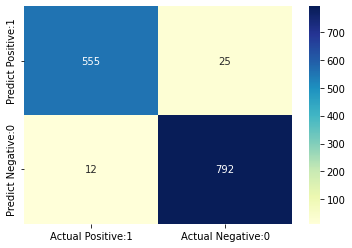

In [ ]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import roc_curve
weighted_prediction = grid.predict(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, weighted_prediction, pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, weighted_prediction)


print(auc_score1)

0.9709855892949047


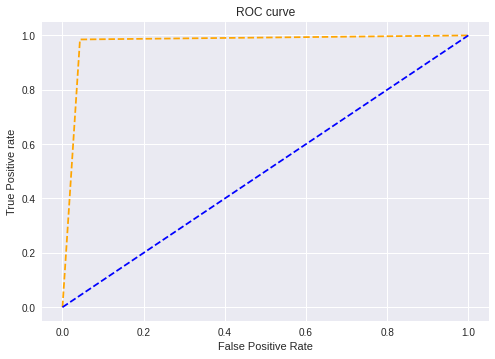

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')


plt.show();

In [ ]:
 movie_review_list=['Bad movie, wouldnt recommend'] 
 movie_vector=vectorizer.transform(movie_review_list)
 pred = grid.predict(movie_vector)

In [ ]:
pred

array([0])

ROSHITA

In [ ]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
model.score(X_test,y_test)

0.9739884393063584

In [ ]:

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}  
grid_SVC = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid_SVC.fit(X_train, y_train)

In [ ]:
weighted_prediction_SVC = grid_SVC.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, weighted_prediction_SVC))
print('F1 score:', f1_score(y_test, weighted_prediction_SVC,average='weighted'))
print('Recall:', recall_score(y_test, weighted_prediction_SVC, average='weighted'))
print('Precision:', precision_score(y_test, weighted_prediction_SVC,average='weighted'))

Accuracy: 0.986271676300578
F1 score: 0.9862562084275729
Recall: 0.986271676300578
Precision: 0.9863267141929085


In [ ]:
print ('Clasification report:\n', classification_report(y_test, weighted_prediction_SVC))

Clasification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       580
           1       0.98      0.99      0.99       804

    accuracy                           0.99      1384
   macro avg       0.99      0.98      0.99      1384
weighted avg       0.99      0.99      0.99      1384



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, weighted_prediction_SVC)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[566  14]
 [  5 799]]

True Positives(TP) =  566

True Negatives(TN) =  799

False Positives(FP) =  14

False Negatives(FN) =  5


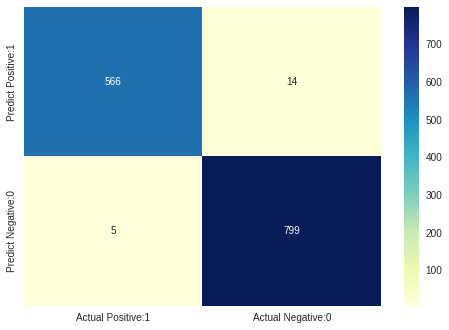

In [ ]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import roc_curve

weighted_prediction2 = model.predict(X_test)
fprSVC, tprSVC, thresh1 = roc_curve(y_test, weighted_prediction_SVC, pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, weighted_prediction_SVC)


print(auc_score1)

0.9848215817464401


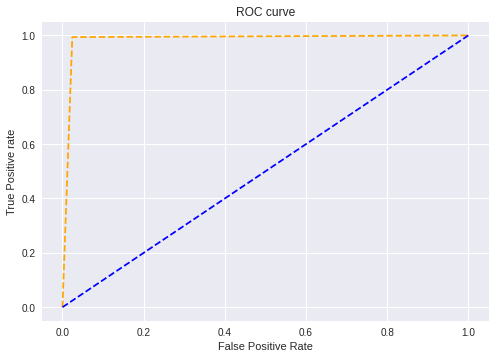

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fprSVC, tprSVC, linestyle='--',color='orange')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')


plt.show();

In [ ]:
 movie_review_list=['Bad movie, wouldnt recommend'] 
 movie_vector=vectorizer.transform(movie_review_list)
 pred = model.predict(movie_vector)

In [ ]:
pred

array([0])

AAYUSHI

<BarContainer object of 2 artists>

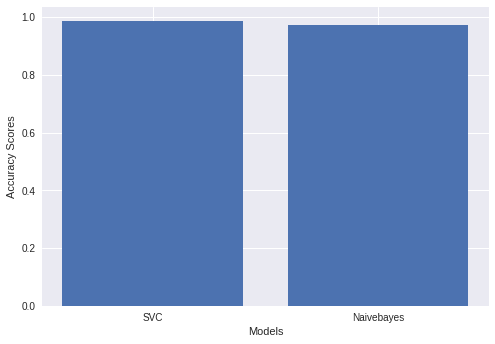

In [ ]:
x=np.array(["SVC","Naivebayes"])
y=np.array([accuracy_score(y_test, weighted_prediction_SVC),accuracy_score(y_test, weighted_prediction)])
plt.xlabel("Models")
plt.ylabel("Accuracy Scores")
plt.bar(x,y)

In [ ]:
MLA = [
    grid,
    grid_SVC,
    ]

In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg
    MLA_compare.loc[row_index, 'Algorithm'] = MLA_name
    MLA_compare.loc[row_index, 'Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
  
MLA_compare

,Algorithm,Accuracy,Precision,Recall,AUC
0,"GridSearchCV(estimator=MultinomialNB(),\n ...",0.9733,0.96940,0.985075,0.970986
1,"GridSearchCV(estimator=SVC(),\n pa...",0.9863,0.98278,0.993781,0.984822


In [ ]:
models = []

models.append(('NB', naive_bayes.MultinomialNB()))
models.append(('SVM', SVC()))

NB: 0.979042 (0.007091)
SVM: 0.978137 (0.006226)


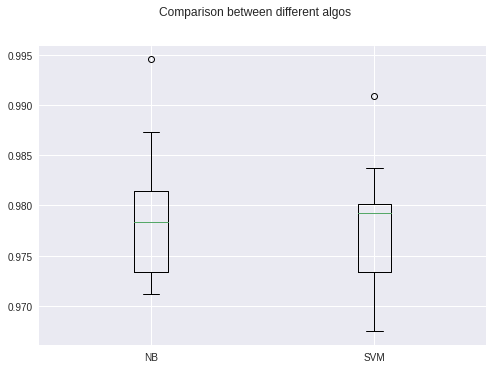

In [ ]:
from sklearn import svm,model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different algos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

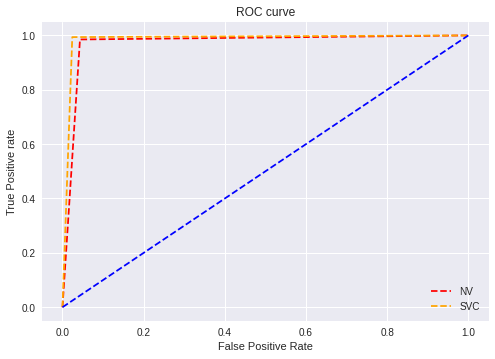

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red')
plt.plot(fprSVC, tprSVC, linestyle='--',color='orange')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(['NV','SVC'])
plt.show();

ATHARVA

In [ ]:
print("Enter a movie:", end=" ")
movie=input()

Enter a movie: Spectre


In [ ]:
recommend(movie)

['Quantum of Solace',
 'Never Say Never Again',
 'Skyfall',
 'Thunderball',
 'From Russia with Love']

In [ ]:
import requests

In [ ]:
pip install IMDbPY

     |████████████████████████████████| 298 kB 6.8 MB/s 


In [ ]:
import imdb
ia = imdb.IMDb()
search = ia.search_movie(movie)
id = search[0].movieID

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
page = requests.get('https://www.imdb.com/title/tt{}/reviews?ref_=tt_urv'.format(id))
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
print('https://www.imdb.com/title/tt{}/reviews?ref_=tt_urv'.format(id))

https://www.imdb.com/title/tt2379713/reviews?ref_=tt_urv


In [ ]:
reviews=[]

In [ ]:
movie_data=soup.find_all('div',attrs= {'class': 'lister-item-content'})


In [ ]:
for store in movie_data:
    review = store.find('a', class_ = 'title').text.replace('\n', '')
    reviews.append(review)

In [ ]:
reviews

[' The second weakest of the Craig Bonds',
 ' A Bond film in the classic mould',
 ' cool but not great',
 " Quality craftsmanship; Kevin McClory's credit missing",
 ' Bond vs. surveillance',
 ' Entertaining and Amusing',
 " Solid and enjoyable even if it could have used more character and spark to make it more than 'a Bond movie'",
 ' I am your best chance of staying alive',
 ' Just go and see this movie. Make your own mind up.',
 " Craig's list ...",
 ' "I\'ve really put you through it, haven\'t I?"',
 ' the James Bond franchise should have ended decades ago',
 ' Waltz Makes It Worthwhile',
 ' Spectre',
 ' All the thrills one hopes for in a Bond Film',
 ' Enjoyable installment in Bond series with lots of noisy action, thrills, emotion and spectacular scenes',
 " It's time to shake up the franchise and add some FUN!",
 ' too long at the fair, 007',
 ' at times Spectre is a lot of fun. other times its just... over-elaborate, even for 007',
 ' Oh well',
 ' Spectre is perhaps the best of 

In [ ]:
for i in reviews:
  movie_vector=vectorizer.transform([i])
  pred = grid_SVC.predict(movie_vector)
  print(i, pred)
   
#0- negative
#1- positive

 The second weakest of the Craig Bonds [0]
 A Bond film in the classic mould [1]
 cool but not great [1]
 Quality craftsmanship; Kevin McClory's credit missing [0]
 Bond vs. surveillance [1]
 Entertaining and Amusing [1]
 Solid and enjoyable even if it could have used more character and spark to make it more than 'a Bond movie' [0]
 I am your best chance of staying alive [1]
 Just go and see this movie. Make your own mind up. [0]
 Craig's list ... [1]
 "I've really put you through it, haven't I?" [1]
 the James Bond franchise should have ended decades ago [0]
 Waltz Makes It Worthwhile [1]
 Spectre [1]
 All the thrills one hopes for in a Bond Film [1]
 Enjoyable installment in Bond series with lots of noisy action, thrills, emotion and spectacular scenes [1]
 It's time to shake up the franchise and add some FUN! [0]
 too long at the fair, 007 [1]
 at times Spectre is a lot of fun. other times its just... over-elaborate, even for 007 [0]
 Oh well [0]
 Spectre is perhaps the best of the 

In [ ]:
#Website uses SVC